## Analysis

1- There appears to be an inverse (negative) relationship between average fare price and total number of rides. In general, average fare price decreases as the total number of rides increase. 

There appears to be a direct relationship between number of rides and driver count...as number of rides increases, so does the driver count.

2- Urban cities account for the majority of fares, rides, and drivers. Something to note, though, is that while urban cities make up 62% of total fares, they comprise 81% of total drivers. Thus driver count and fare total do not have the same proportions per city type.

3 - Rural average fare prices have the greatest range (~twenty dollar range from lowest to highest average fare), ranging from twenty-four dollars to forty-four dollars. WIth that said, the most expensive (top four) average fares are in rural cities. Urban and Surburban cities tend to have an average fare range of ten to twelve dollars (urban being closer to ten).

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
#Load Data
city_data = pd.read_csv("raw_data/city_data.csv")
ride_data = pd.read_csv("raw_data/ride_data.csv")

#Merge City and Ride datasets
merged_df = pd.merge(ride_data, city_data, how="left", on="city")
merged_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [27]:
#Calculate Average Fare per City
avg_city_fare = ride_data.groupby('city')['fare'].mean().reset_index()

#Calculate Total Number of Rides per City
ride_count = ride_data.groupby('city')['ride_id'].count().reset_index()

#Merge Avg Fare and Total # of Ride Dataframes
city_analysis_df = pd.merge(avg_city_fare, ride_count, on="city")

#Merge City Analysis Dataframe with orig City_Data DF to include city type
city_analysis_df = pd.merge(city_analysis_df, city_data, on='city')
city_analysis_df = city_analysis_df.rename(columns={'fare': 'avg_fare', 'ride_id': 'ride_count'})

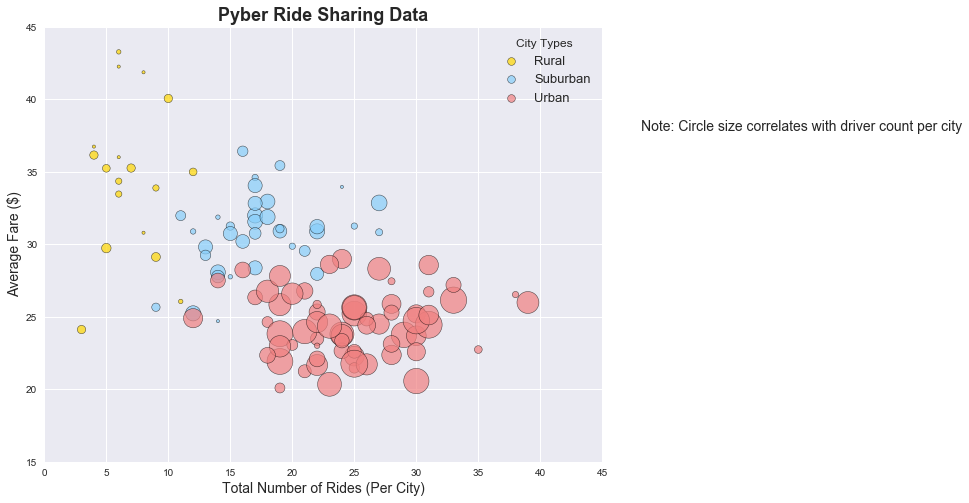

In [28]:
#Define data sets for each city type
urban_data = city_analysis_df.loc[city_analysis_df['type'] == 'Urban']
rural_data = city_analysis_df.loc[city_analysis_df['type'] == 'Rural']
suburban_data = city_analysis_df.loc[city_analysis_df['type'] == 'Suburban']

#Create Scatterplots - one for each city type
sns.set()
plt.figure(figsize=(10,8))
rural_plot = plt.scatter(rural_data['ride_count'], rural_data['avg_fare'], s=(rural_data['driver_count'] * 10), 
            label ='Rural', c='gold', alpha=0.7, edgecolor='black', linewidth=.5)
suburban_plot = plt.scatter(suburban_data['ride_count'], suburban_data['avg_fare'], s=(suburban_data['driver_count'] * 10), 
            label ='Suburban', c='lightskyblue', alpha=0.7, edgecolor='black', linewidth=.5)
urban_plot = plt.scatter(urban_data['ride_count'], urban_data['avg_fare'], s=(urban_data['driver_count'] * 10), 
            label ='Urban', c='lightcoral', alpha=0.7, edgecolor='black', linewidth=.5)

#Set Scatterplot x,y limits
plt.ylim(15,45)
plt.xlim(0,45)

#Set Plot Title and Labels
plt.title("Pyber Ride Sharing Data", fontsize="18", fontweight='semibold')
plt.xlabel("Total Number of Rides (Per City)", fontsize="14")
plt.ylabel("Average Fare ($)", fontsize="14")

#Create Legend
lgnd = plt.legend(loc='best', title = 'City Types', fontsize='13')
#Adjust Legend Marker Size so same size
lgnd.legendHandles[0]._sizes = [60]
lgnd.legendHandles[1]._sizes = [60]
lgnd.legendHandles[2]._sizes = [60]

plt.text(1.4, .7, "Note: Circle size correlates with driver count per city", horizontalalignment="right", fontsize="14", transform=plt.gcf().transFigure)

plt.show()

## Total Fares by City Type

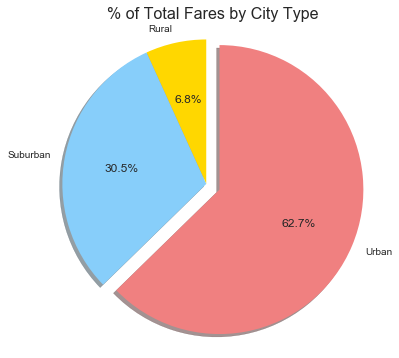

In [33]:
#Sum total fares by city type and create dataframe
fares_by_city_type = merged_df.groupby("type")['fare'].sum().reset_index()

#Define pie chart colors, explode, and figure size
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.figure(figsize=(6,6))

#Create pie chart
plt.pie(fares_by_city_type['fare'], labels=fares_by_city_type['type'], 
        explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.title("% of Total Fares by City Type", fontsize="16")

plt.show()

## Total Rides by City Type

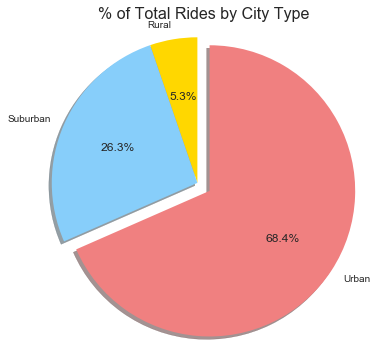

In [24]:
#Count number of rides per city type and create dataframe
rides_by_city_type = merged_df.groupby("type")['ride_id'].count().reset_index()

#Define pie chart colors, explode, and figure size
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.figure(figsize=(6,6))

#Create pie chart
plt.pie(rides_by_city_type['ride_id'], labels=rides_by_city_type['type'], 
        explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.title("% of Total Rides by City Type", fontsize="16")
plt.show()

## Total Drivers by City Type

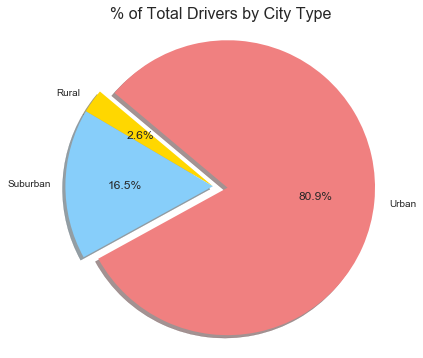

In [25]:
#Sum total number of drivers for each city type and create dataframe
drivers_by_city_type = city_data.groupby("type")['driver_count'].sum().reset_index()

#Define pie chart colors, explode, and figure size
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.figure(figsize=(6,6))

#Create pie chart
plt.pie(drivers_by_city_type['driver_count'], labels=drivers_by_city_type['type'], 
        explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Total Drivers by City Type", fontsize="16")

plt.show()